In [380]:
import numpy as np
from random import random
from functools import reduce
from collections import namedtuple
from queue import PriorityQueue, SimpleQueue, LifoQueue
import matplotlib.pyplot as plt

In [381]:
# constants
PROBLEM_SIZE = 5   # dimension of the finite set U
NUMBER_SET = 10     # number of subsets in the collection S

State = namedtuple('State', ['taken','not_taken'])


In [382]:
def goal_check(state,sets):
    """
    check if the logical OR all the elements yeald a line of all true ie the
    condition for a state to be covering the whole set U
    """
    return np.all(reduce(np.logical_or, [sets[i] for i in state.taken], np.zeros(PROBLEM_SIZE)))


In [383]:
def solve(queuetype, steps, sets):
    if queuetype == "priority":
        frontier = PriorityQueue()
    elif queuetype == "simple":
        frontier = SimpleQueue()
    elif queuetype == "lifo":
        frontier = LifoQueue()

    initial_state = State(set(), set(range(NUMBER_SET)))
    frontier.put(initial_state)

    counter = 0
    while not frontier.empty():
        counter += 1

        current_state = frontier.get()

        if goal_check(current_state, sets):
            steps.append(counter)
            return

        for action in current_state.not_taken:
            new_state = State(
                current_state.taken ^ {action}, current_state.not_taken ^ {action}
            )
            frontier.put(new_state)

    steps.append(counter)


In [384]:
# number of steps for a solution to be found
pq_steps = []
sq_steps = []
lfq_steps = []

N_ITERS = 100

for i in range(N_ITERS):
    sets = tuple(
        np.array([random() < 0.3 for i in range(PROBLEM_SIZE)])
        for j in range(NUMBER_SET)
    )  # generate sets in S

    # assert generated problem is solvable, ie the goal check of a stete with all
    # sets taken is true
    if goal_check(State(range(NUMBER_SET), 0), sets):
        solve("priority",pq_steps, sets)
        solve("simple",sq_steps, sets)
        solve("lifo",lfq_steps, sets)


In [385]:
# average number of steps for each queue type
pq_mean = np.mean(pq_steps)
sq_mean = np.mean(sq_steps)
lfq_mean = np.mean(lfq_steps)

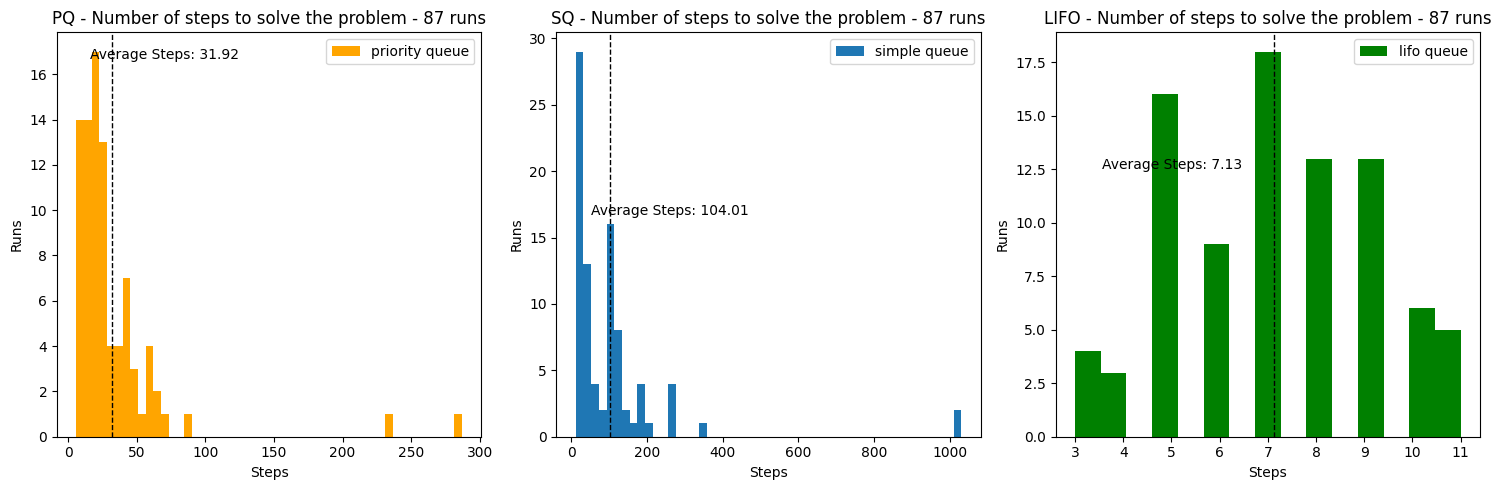

In [386]:

# Create a figure with three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))



axs[0].hist(pq_steps,bins=50,  label="priority queue", color='orange')
axs[0].axvline(pq_mean, color='k', linestyle='dashed', linewidth=1)
axs[0].text(pq_mean / 2, N_ITERS / 6, 'Average Steps: {:.2f}'.format(pq_mean))
axs[0].legend(loc='upper right')
axs[0].set_title(f"PQ - Number of steps to solve the problem - {len(pq_steps)} runs")
axs[0].set_ylabel("Runs")
axs[0].set_xlabel("Steps")

axs[1].hist(sq_steps,bins=50, label="simple queue")
axs[1].axvline(sq_mean, color='k', linestyle='dashed', linewidth=1)
axs[1].text(sq_mean / 2, N_ITERS / 6, 'Average Steps: {:.2f}'.format(sq_mean))
axs[1].legend(loc='upper right')
axs[1].set_title(f"SQ - Number of steps to solve the problem - {len(sq_steps)} runs")
axs[1].set_ylabel("Runs")
axs[1].set_xlabel("Steps")

axs[2].hist(lfq_steps,bins=15, label="lifo queue", color='green')
axs[2].axvline(lfq_mean, color='k', linestyle='dashed', linewidth=1)
axs[2].text(lfq_mean / 2, N_ITERS / 8, 'Average Steps: {:.2f}'.format(lfq_mean))
axs[2].legend(loc='upper right')
axs[2].set_title(f"LIFO - Number of steps to solve the problem - {len(lfq_steps)} runs")
axs[2].set_ylabel("Runs")
axs[2].set_xlabel("Steps")

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the figure with all three subplots
plt.show()